<a href="https://colab.research.google.com/github/wakana23/anime2021/blob/main/%E6%95%B0%E5%80%A4%E8%A8%88%E7%AE%97%E6%B3%95IDay4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

コースワーク２

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
try:
    import japanize_matplotlib #matplotlibの日本語化  
except ModuleNotFoundError:
    import os
    os.system('pip3 install japanize_matplotlib')
    import japanize_matplotlib 
sns.set(font="IPAexGothic") #日本語フォント設定


In [197]:
import pandas as pd

In [198]:
!wget https://kkuramitsu.github.io/lec/data/bento.csv

--2022-05-24 07:37:41--  https://kkuramitsu.github.io/lec/data/bento.csv
Resolving kkuramitsu.github.io (kkuramitsu.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to kkuramitsu.github.io (kkuramitsu.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14821 (14K) [text/csv]
Saving to: ‘bento.csv.8’

bento.csv.8         100%[===================>]  14.47K  --.-KB/s    in 0s      

2022-05-24 07:37:41 (54.0 MB/s) - ‘bento.csv.8’ saved [14821/14821]



In [199]:
df = pd.read_csv('bento.csv')
df.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       207 non-null    object 
 1   y              207 non-null    int64  
 2   week           207 non-null    object 
 3   soldout        207 non-null    int64  
 4   name           207 non-null    object 
 5   kcal           166 non-null    float64
 6   remarks        21 non-null     object 
 7   event          14 non-null     object 
 8   payday         10 non-null     float64
 9   weather        207 non-null    object 
 10  precipitation  207 non-null    object 
 11  temperature    207 non-null    float64
dtypes: float64(3), int64(2), object(7)
memory usage: 19.5+ KB


In [201]:
df['kcal'].describe()

count    166.000000
mean     404.409639
std       29.884641
min      315.000000
25%      386.000000
50%      408.500000
75%      426.000000
max      462.000000
Name: kcal, dtype: float64

In [202]:
df['kcal'] = df['kcal'].fillna(df['kcal'].mean()).astype(int)
df.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,404,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,404,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,404,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,404,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,404,NaN,NaN,NaN,快晴,--,16.1


In [203]:
df['payday'] = df['payday'].fillna(0)
df['event'] = df['event'].fillna('なし')
df['remarks'] = df['remarks'].fillna('特になし')
df.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,404,特になし,なし,0.0,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,404,特になし,なし,0.0,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,404,特になし,なし,0.0,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,404,特になし,なし,0.0,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,404,特になし,なし,0.0,快晴,--,16.1


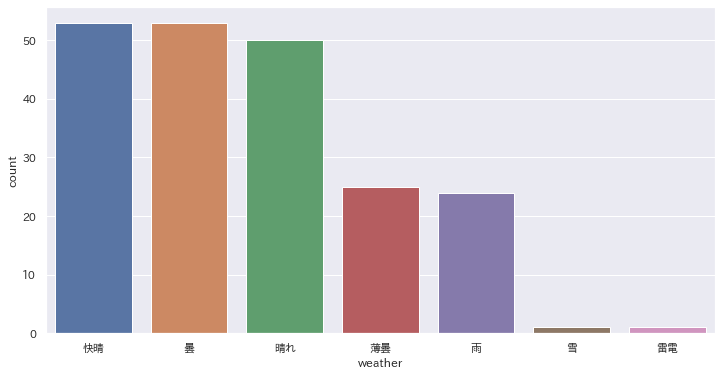

In [204]:
plt.figure(figsize=(12, 6))
sns.countplot(x='weather', data=df)
plt.show()

In [205]:
df['weather']=df['weather'].map({
    '快晴': 0, '晴': 1, '薄曇': 2, '曇': 3, '雨': 4, '雷雨': 5, '雪': 6
})

In [206]:
df['weather'] = df['weather'].fillna(df['weather'].mean()).astype(int)
df.head()


,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,404,特になし,なし,0.0,0,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,404,特になし,なし,0.0,0,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,404,特になし,なし,0.0,0,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,404,特になし,なし,0.0,0,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,404,特になし,なし,0.0,0,--,16.1


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       207 non-null    object 
 1   y              207 non-null    int64  
 2   week           207 non-null    object 
 3   soldout        207 non-null    int64  
 4   name           207 non-null    object 
 5   kcal           207 non-null    int64  
 6   remarks        207 non-null    object 
 7   event          207 non-null    object 
 8   payday         207 non-null    float64
 9   weather        207 non-null    int64  
 10  precipitation  207 non-null    object 
 11  temperature    207 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 19.5+ KB


In [208]:
df.groupby('weather')['y'].median()

weather
0    107.0
1     68.0
2     65.0
3     70.0
4     74.0
6     86.0
Name: y, dtype: float64

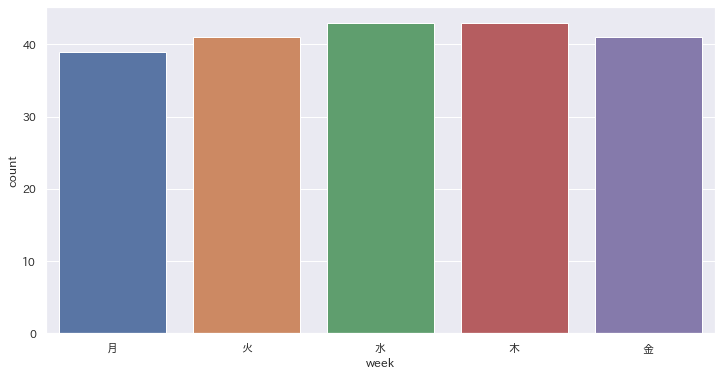

In [209]:
plt.figure(figsize=(12, 6))
sns.countplot(x='week', data=df)
plt.show()

In [210]:
df['week']=df['week'].map({
    '月': 0, '火': 1, '水': 2, '木': 3, '金': 4
})


In [211]:
df['week'] = df['week'].fillna(df['week'].mean()).astype(int)
df.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,0,0,厚切りイカフライ,404,特になし,なし,0.0,0,--,19.8
1,2013-11-19,101,1,1,手作りヒレカツ,404,特になし,なし,0.0,0,--,17.0
2,2013-11-20,118,2,0,白身魚唐揚げ野菜あん,404,特になし,なし,0.0,0,--,15.5
3,2013-11-21,120,3,1,若鶏ピリ辛焼,404,特になし,なし,0.0,0,--,15.2
4,2013-11-22,130,4,1,ビッグメンチカツ,404,特になし,なし,0.0,0,--,16.1


In [212]:
df_week = pd.get_dummies(df['week'], dummy_na=False, columns=['week'])
df_week.head()


,0,1,2,3,4
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1


In [213]:
df.groupby('week')['y'].median()


week
0    82.0
1    78.0
2    72.0
3    64.0
4    87.0
Name: y, dtype: float64

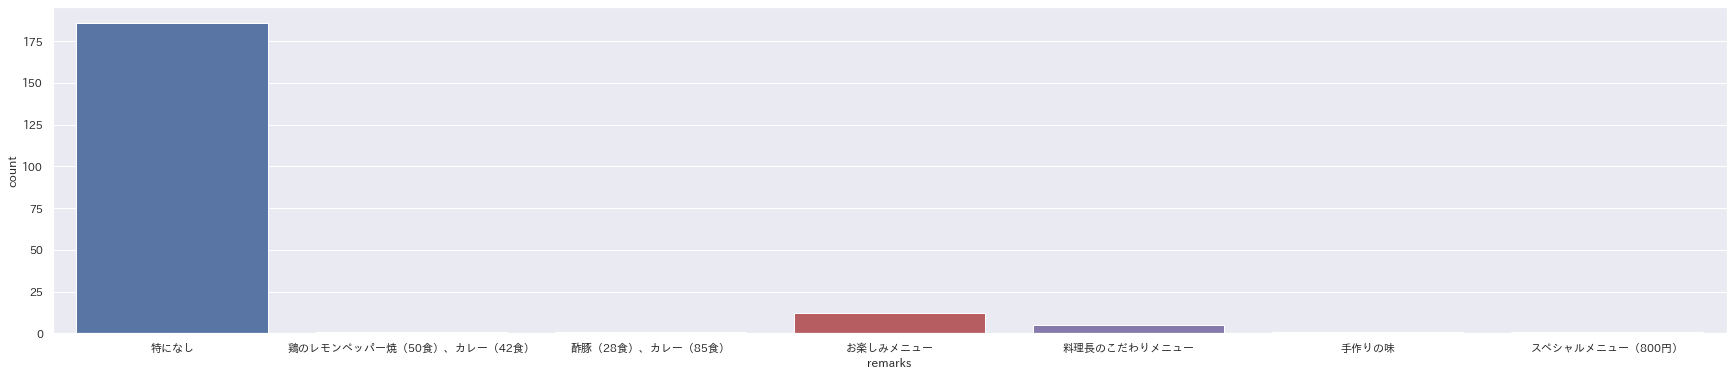

In [214]:
plt.figure(figsize=(30, 6))
sns.countplot(x='remarks', data=df)
plt.show()

In [215]:
df['remarks']=df['remarks'].map({
    '特になし': 0, '鶏のレモンペッパー焼（50食）': 1, 'カレー（42食）': 
    2, '酢豚（28食）': 3, 'カレー（85食）': 4, 'お楽しみメニュー': 5,
     '料理長のこだわりメニュー': 6,
     '手作りの味': 7, 'スペシャルメニュー（800円）':8
})


In [216]:
df['remarks'] = df['remarks'].fillna(df['remarks'].mean()).astype(int)
df.head()


,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,0,0,厚切りイカフライ,404,0,なし,0.0,0,--,19.8
1,2013-11-19,101,1,1,手作りヒレカツ,404,0,なし,0.0,0,--,17.0
2,2013-11-20,118,2,0,白身魚唐揚げ野菜あん,404,0,なし,0.0,0,--,15.5
3,2013-11-21,120,3,1,若鶏ピリ辛焼,404,0,なし,0.0,0,--,15.2
4,2013-11-22,130,4,1,ビッグメンチカツ,404,0,なし,0.0,0,--,16.1


In [217]:
df_remarks = pd.get_dummies(df['remarks'], dummy_na=False, columns=['remarks'])
df_remarks.head()


,0,5,6,7,8
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [218]:
df.groupby('remarks')['y'].median()

remarks
0     77.0
5    117.0
6     54.0
7     68.0
8     45.0
Name: y, dtype: float64

In [219]:
from sklearn.linear_model import LinearRegression

決定係数（R2）： 0.007952120940950769


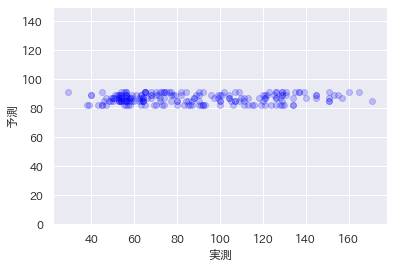

In [220]:
X = df[['week']]
y = df['y']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
plt.scatter(y, y_pred, color = 'blue', alpha=0.2)
plt.xlabel('実測')
plt.ylabel('予測')
plt.ylim(0, 150)

from sklearn.metrics import r2_score

r2= r2_score(y, y_pred)
print('決定係数（R2）：', r2)

決定係数（R2）： 0.02983658834675762


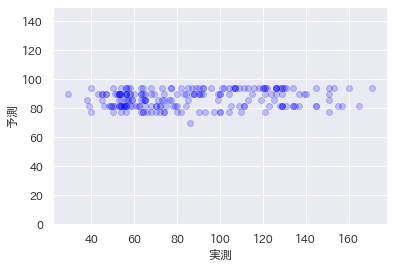

In [221]:
X = df[['weather']]
y = df['y']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
plt.scatter(y, y_pred, color = 'blue', alpha=0.2)
plt.xlabel('実測')
plt.ylabel('予測')
plt.ylim(0, 150)

from sklearn.metrics import r2_score

r2= r2_score(y, y_pred)
print('決定係数（R2）：', r2)

決定係数（R2）： 3.038047227699181e-05


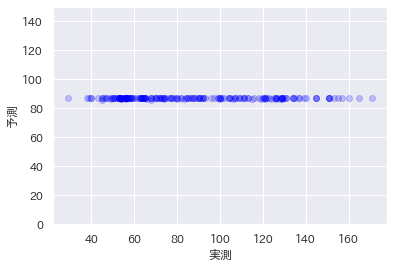

In [222]:
X = df[['remarks']]
y = df['y']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
plt.scatter(y, y_pred, color = 'blue', alpha=0.2)
plt.xlabel('実測')
plt.ylabel('予測')
plt.ylim(0, 150)

from sklearn.metrics import r2_score

r2= r2_score(y, y_pred)
print('決定係数（R2）：', r2)